### Please copy each line into a different cell in Jupyter notebook and a) comment on what every line is doing to demonstrate your understanding b) run/print as many lines of code in each cell as possible to see the output. This should help your understanding of Random Forest implementation. Lets keep moving forward!


Fortunately, with libraries such as Scikit-Learn, it’s now easy to implement hundreds of machine learning algorithms in Python. 



It’s so easy that we often don’t need any underlying knowledge of how the model works in order to use it. 




While knowing all the details is not necessary, it’s still helpful to have an idea of how a machine learning model works under the hood. 




This lets us diagnose the model when it’s underperforming or explain how it makes decisions, which is crucial if we want to convince others to trust our models.



In this Codealong notebook, we’ll look at how to build and use the Random Forest in Python. In addition to seeing the code, we’ll try to get an understanding of how this model works.





# Imports

In [1]:
# Pandas and numpy
import pandas as pd
import numpy as np

# scikt-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

//anaconda3/envs/nf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
//anaconda3/envs/nf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


# Load Data

In [4]:
# Use Pandas' read_csv method
df = pd.read_csv('clean_data.csv')

In [5]:
# Create a pristine copy of the data
df_copy = df.copy()

In [6]:
df.head()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,49.0,4.0,1100.0,2.015009e+09,2.015009e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
1,9.0,9.0,1100.0,2.015005e+09,2.015005e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
2,34.0,10.0,1100.0,2.015011e+09,2.015011e+09,NaN,NaN,NaN,NaN,NaN,...,4.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
3,41.0,4.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,2.0
4,54.0,5.0,1100.0,2.015004e+09,2.015004e+09,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0


In [8]:
df.tail()

,_STATE,FMONTH,DISPCODE,SEQNO,_PSU,CTELENUM,PVTRESD1,COLGHOUS,STATERES,CELLFON3,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
99714,30.0,1.0,1100.0,2.015001e+09,2.015001e+09,1.0,1.0,NaN,1.0,2.0,...,2.0,2.0,3.0,3.0,4.0,1.0,2.0,NaN,NaN,9.0
99715,27.0,3.0,1100.0,2.015001e+09,2.015001e+09,1.0,1.0,NaN,1.0,1.0,...,2.0,2.0,3.0,3.0,4.0,1.0,1.0,NaN,NaN,2.0
99716,8.0,7.0,1100.0,2.015002e+09,2.015002e+09,1.0,1.0,NaN,1.0,2.0,...,2.0,2.0,2.0,1.0,3.0,1.0,1.0,NaN,NaN,2.0
99717,21.0,7.0,1100.0,2.015003e+09,2.015003e+09,1.0,1.0,NaN,1.0,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
99718,50.0,5.0,1100.0,2.015001e+09,2.015001e+09,1.0,1.0,NaN,1.0,1.0,...,1.0,1.0,3.0,3.0,4.0,1.0,1.0,1.0,1.0,2.0


In [9]:
df.shape

(99719, 314)

99719 records, 314 potential features to work with.

# Data Exploration

In [ ]:
# Extract labels
#labels = np.array(df.pop('label'))

In [10]:
# Look for missing values
df.isna().sum()

_STATE          0
FMONTH          0
DISPCODE        0
SEQNO           0
_PSU            0
CTELENUM    42298
PVTRESD1    42298
COLGHOUS    99711
STATERES    42298
CELLFON3    42298
LADULT      99711
NUMADULT    42304
NUMMEN      42330
NUMWOMEN    42330
CTELNUM1    57421
CELLFON2    57421
CADULT      57422
PVTRESD2    57421
CCLGHOUS    99485
CSTATE      57421
LANDLINE    57587
HHADULT     58541
PERSDOC2        0
MEDCOST         0
CHECKUP1        0
BPHIGH4         0
BPMEDS      59490
BLOODCHO        0
CHOLCHK     13251
TOLDHI2     13251
            ...  
PADUR1_     34629
PADUR2_     56245
PAFREQ1_    33841
PAFREQ2_    55681
_MINAC11    35028
_MINAC21    35560
STRFREQ_     9898
PAMISS1_        0
PAMIN11_    35706
PAMIN21_    36239
PA1MIN_     34333
PAVIG11_    34616
PAVIG21_    35670
PA1VIGM_    34003
_PACAT1         0
_PAINDX1        0
_PA150R2        0
_PA300R2        0
_PA30021        0
_PASTRNG        0
_PAREC1         0
_PASTAE1        0
_LMTACT1      656
_LMTWRK1      656
_LMTSCL1  

Many columns with missing values. Normally, this would require extensive data cleaning etc. However, as this is codealong, we will just impute the NaNs.

In [13]:

#####
# In the RF tutorial notebook, the test NaNs in the test set are filled 
# with the mean of the train!
#####



# Imputing missing values with mean with inplace=True
df.fillna(df.mean(), inplace=True)

In [14]:
# Check again
df.isna().sum()

_STATE      0
FMONTH      0
DISPCODE    0
SEQNO       0
_PSU        0
CTELENUM    0
PVTRESD1    0
COLGHOUS    0
STATERES    0
CELLFON3    0
LADULT      0
NUMADULT    0
NUMMEN      0
NUMWOMEN    0
CTELNUM1    0
CELLFON2    0
CADULT      0
PVTRESD2    0
CCLGHOUS    0
CSTATE      0
LANDLINE    0
HHADULT     0
PERSDOC2    0
MEDCOST     0
CHECKUP1    0
BPHIGH4     0
BPMEDS      0
BLOODCHO    0
CHOLCHK     0
TOLDHI2     0
           ..
PADUR1_     0
PADUR2_     0
PAFREQ1_    0
PAFREQ2_    0
_MINAC11    0
_MINAC21    0
STRFREQ_    0
PAMISS1_    0
PAMIN11_    0
PAMIN21_    0
PA1MIN_     0
PAVIG11_    0
PAVIG21_    0
PA1VIGM_    0
_PACAT1     0
_PAINDX1    0
_PA150R2    0
_PA300R2    0
_PA30021    0
_PASTRNG    0
_PAREC1     0
_PASTAE1    0
_LMTACT1    0
_LMTWRK1    0
_LMTSCL1    0
_RFSEAT2    0
_RFSEAT3    0
_FLSHOT6    0
_PNEUMO2    0
_AIDTST3    0
Length: 314, dtype: int64

No more missing values!

In [15]:
# Set a random seed
r_seed = 50

In [17]:
# Extract labels
labels = np.array(df.pop('label'))

In [18]:
df.shape

(99719, 313)

popped the label column, so down to 313 columns

In [25]:
# Split into train and test data, test size 30%
X_train, X_test, train_labels, test_labels = train_test_split(
    df,
    labels,
    random_state=r_seed,
    test_size=.3,
    stratify=labels
    )

Open questions: what does stratify option do?

In [22]:
# Create list of features
features = list(df.columns)

In [23]:
# Creating a RandomForestClassifier object
model = RandomForestClassifier(
    n_estimators=100, # How many different estimators to put into the forest
    random_state=r_seed,
    max_features='sqrt', #??
    n_jobs=-1, # Basically says on how many CPU cores to run the algorithm
    verbose=1
)

Check the meaning of the arguments!
 n_jobs: 
 max_features:
 n_estimators:

In [26]:
model.fit(X_train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [29]:
# Create empty lists to evaluate on 
n_nodes = []
max_depths = []

# Iterate over model estimators and return some stats
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [30]:
# Print stats
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 13396
Average maximum depth 46


In [34]:
# Training predictions to demonstrate overfitting of the model
train_rf_predictions = model.predict(X_train)
train_rf_probs = model.predict_proba(X_train)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [35]:
# Testing predictions to determine performance
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


In [37]:
# Import some scoring metric from sklearn
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
# Import matplotlib for plotting
import matplotlib.pyplot as plt

In [38]:
# Set plot format
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

In [57]:
# Do some evaluation
def evaluate_model(predictions, probs, train_predictions, train_probs):
    '''
    Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve.
    '''
    # Create Empty dict
    baseline = {}
    
    # Calculate recall score
    baseline['recall'] = recall_score(
        test_labels, 
        [1 for _ in range(len(test_labels))]
    )

    # Calculate precision score
    baseline['precision'] = precision_score(
        test_labels,
        [1 for _ in range(len(test_labels))]
    )
    # Set baseline 'roc'
    baseline['roc'] = 0.5

    # Create Empty dict for results from model
    results = {}
    # Calculate recall score for model
    results['recall'] = recall_score(
        test_labels, 
        predictions,
    )
    # Calculate precision score
    results['precision'] = precision_score(
        test_labels,
        predictions
    )
    # Calculate results 'roc'
    results['roc'] = roc_auc_score(test_labels, probs)
    
    # Repeat for training results / scores
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    
    for metric in ['recall', 'precision', 'roc']:
        print('{} Baseline: {} Test: {} Train: {}'.format(
            metric.upper(),
            round(baseline[metric], 2),
            round(results[metric], 2),
            round(train_results[metric], 2))
             )
    
    # Calculate false positive rates and true positive rates for performance baseline and model
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for i in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    # Set figure properies
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot baseline and model curves
    plt.plot(base_fpr, base_tpr, c='b', label='Baseline')
    plt.plot(model_fpr, model_tpr, c='r', label='Model')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.show()
    

RECALL Baseline: 1.0 Test: 0.96 Train: 1.0
PRECISION Baseline: 0.81 Test: 0.88 Train: 1.0
ROC Baseline: 0.5 Test: 0.87 Train: 1.0


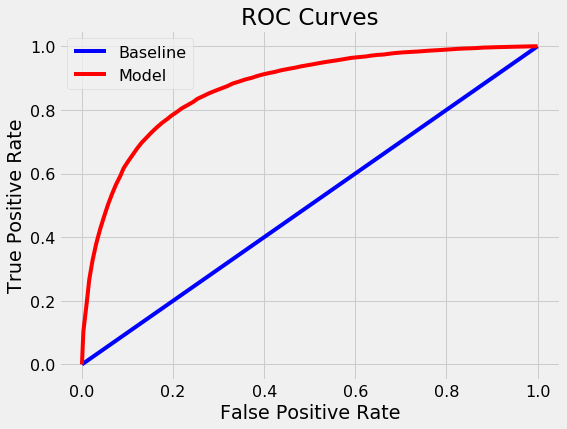

In [59]:
# Run the function and print the scores / graph
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

This doesn't look too bad.

In [60]:
# Import 
from sklearn.metrics import confusion_matrix
import itertools

In [75]:
def plot_confusion_matrix(
    cm,
    classes,
    normalize=False,
    title='Confusion Matrix',
    cmap=plt.cm.Oranges
    ):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html    
    '''
    if normalize:
        cm = cm.astypes('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix without normalization')
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.        

    print(cm)
    
    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[j, i], fmt),
            fontsize=20,
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black'
        )
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size=18)
    plt.xlabel('Predicted label', size=18)

Confusion Matrix without normalization
[[ 2419  3155]
 [ 1036 23306]]


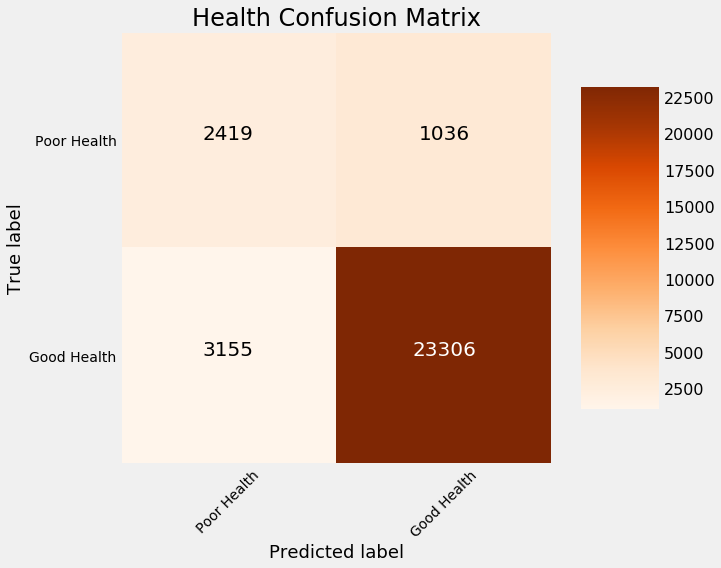

In [76]:
# Create confusion matrix
cm = confusion_matrix(test_labels, rf_predictions)

# Call function that plots the confusion matrix out
plot_confusion_matrix(cm, classes = ['Poor Health', 'Good Health'],
                      title = 'Health Confusion Matrix')